In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
tf.__version__ 

'2.3.0'

In [3]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

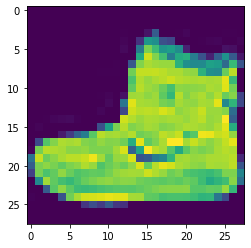

In [6]:
plt.imshow(train_image[0])

In [7]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_image = train_image/255
test_image = test_image/255 

In [9]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [11]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [13]:
model_onehot = tf.keras.Sequential()
model_onehot.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_onehot.add(tf.keras.layers.Dense(128, activation='relu'))
model_onehot.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
model_onehot.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [15]:
model_onehot.fit(train_image, train_label_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5020 - acc: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - acc: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - acc: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3163 - acc: 0.8837
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - acc: 0.8901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - acc: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - acc: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - acc: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - acc: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - acc: 0.9093


In [16]:
predict = model_onehot.predict(test_image)

In [17]:
predict.shape

(10000, 10)

In [18]:
predict[0]

array([7.0764982e-06, 1.1396184e-09, 7.2521438e-08, 3.8834722e-09,
       2.7543891e-08, 4.5184432e-05, 1.3860252e-07, 2.9249622e-03,
       2.8515379e-07, 9.9702221e-01], dtype=float32)

In [19]:
np.argmax(predict[0])

9

In [20]:
test_label[0]

9

In [21]:
model_onehot.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 2ms/step - loss: 0.3405 - acc: 0.8821


[0.34052222967147827, 0.882099986076355]